# Esercitazione 10
2 - 5 Maggio 2023

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [12]:
import numpy as np
import scipy.linalg as spLin
import RisolviSis
import matplotlib.pyplot as plt


In [13]:
def eqnorm(A, b):
    G = A.T @ A
    y = A.T @ b
    L = spLin.cholesky(G, lower=True)
    z, flag = RisolviSis.Lsolve(L, y)
    print("Indice di condizionamento di G ", np.linalg.cond(G))
    
    if flag == 0:
        x, flag = RisolviSis.Usolve(L.T, z)

    return x


Indice di condizionamento di G  5.27297104169736


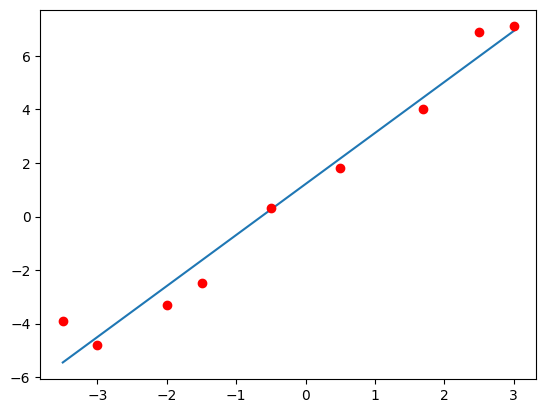

2.2258970863642764


In [14]:
x = np.array([-3.5, -3,-2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9,-4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
m = x.shape[0]
n = 1 # grado del polinomio
#n = 2
n1 = n + 1 # gradi di libertà del polinomio di grado n, il suo ordine
# La matrice va tagliata per seguire l'algoritmo e non va considerata tutta
B = np.vander(x, increasing=True)[:, :n1]
a = eqnorm(B, y)
xv = np.linspace(np.min(x), np.max(x), 200)

# Etichette restituite
pol1 = np.polyval(np.flip(a), xv)
plt.plot(xv, pol1, x, y, 'ro')
plt.show()

# Errore: norma 2 al quadrato in corrispondenza dei valori in x.
# Con valori di n sempre più maggiori il metodo ha un errore migliore
# ma più il valore di n è alto è peggio è. Si procede con fattorizzazione
# QR.
err = np.linalg.norm(y - np.polyval(np.flip(a), x))
print(err)


### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [15]:
def qrLS(A, b):
    n = A.shape[1]
    Q, R = spLin.qr(A)
    
    # Risolvo il sistema triangolare superiore: prime n righe e tutte le colonne
    # per avere una matrice quadrata
    h = Q.T @ b
    x, flag = RisolviSis.Usolve(R[0:n, :], h[0:n])
    residuo = np.linalg.norm(h[n:])**2

    return x, residuo


4.954617839084977


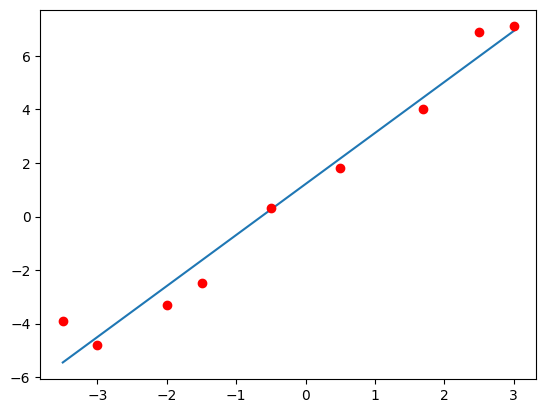

2.2258970863642764


In [16]:
x = np.array([-3.5, -3,-2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9,-4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
m = x.shape[0]
n = 1 # grado del polinomio
#n = 2
n1 = n + 1 # gradi di libertà del polinomio di grado n, il suo ordine
# La matrice va tagliata per seguire l'algoritmo e non va considerata tutta
B = np.vander(x, increasing=True)[:, :n1]
a, residuo = qrLS(B, y)
print(residuo)
xv = np.linspace(np.min(x), np.max(x), 200)

# Etichette restituite
pol1 = np.polyval(np.flip(a), xv)
plt.plot(xv, pol1, x, y, 'ro')
plt.show()

# Errore: norma 2 al quadrato in corrispondenza dei valori in x.
# Con valori di n sempre più maggiori il metodo ha un errore migliore
# ma più il valore di n è alto è peggio è. Si procede con fattorizzazione
# QR.
err = np.linalg.norm(y - np.polyval(np.flip(a), x))
print(err)


### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [17]:
def SVDLS(A, b):
    n = A.shape[1]  # numero di colonne di A
    # Attenzione : Restituisce U, Sigma e VT=VTrasposta)
    U, s, VT = spLin.svd(A)
    V = VT.T
    # Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    thresh = np.spacing(1)*m*s[0]
    k = np.count_nonzero(s > thresh)
    print("rango=", k)
    d = U.T@b
    d1 = d[:k].reshape(k, 1)
    s1 = s[:k].reshape(k, 1)
    # Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c = d1/s1
    x = V[:, :k]@c
    residuo = np.linalg.norm(d[k:])**2
    return x, residuo


## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



resdiuo  2.705705543331559


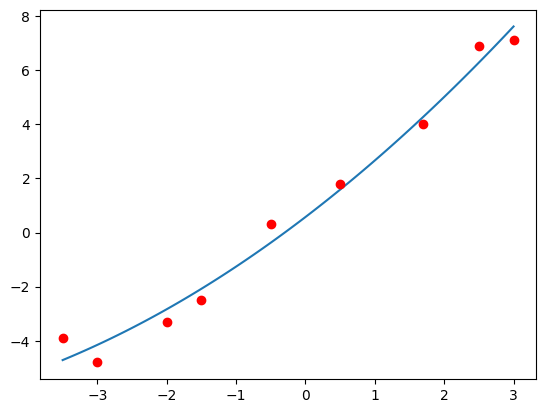

errore  2.705705543331556


In [18]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
# x=np.array( [-3.14,  -2.4,  -1.57,  -0.7,  -0.3,  0,  0.4,  0.7,  1.57]  )
# y=np.array(  [0.02,  -1, -0.9,   -0.72,   -0.2,   -0.04,  0.65,   0.67,   1.1] )
# x  = np.array([1.001, 1.004, 1.005,1.0012, 1.0013,   1.0014,   1.0015,  1.0016])
# y  = np.array([-1.2,-1.0, -0.98,-0.95,-0.9, -1.15, -1.1, -1])
m = x.shape[0]
n = 2  # grado del polinomio di regressione
n1 = n+1  # gradi di libertà
A = np.vander(x, increasing=True)[:, :n1]
alpha, residuo = SVDLS(A, y)
# alpha=eqnorm(A,y)

print("resdiuo ", residuo)
xv = np.linspace(np.min(x), np.max(x), 100)
pol1 = np.polyval(np.flip(alpha), xv)
plt.plot(xv, pol1, x, y, 'ro')
plt.show()
errore = np.linalg.norm(y-np.polyval(np.flip(alpha), x))**2
print("errore ", errore)


## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



condizionamento di A2  4.663457775986456
Indice di condizionamento di G  21.747838428408542


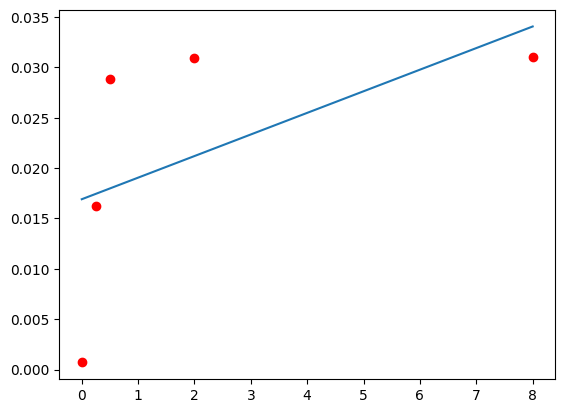

errore  0.0004848327762313228


In [19]:
x2 = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
y2 = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])
m = x2.shape[0]
n = 1  # retta di regressione: grado 1
n1 = n+1  # gradi di libertà
A2 = np.vander(x2, increasing=True)[:, :n1]
condA2 = np.linalg.cond(A2)
print("condizionamento di A2 ", condA2)
# Poichè la matrice A è ben condizionata uso il metodo delle equazioni normali,
# la matrice G=A.T@A avrà un indice di condizionamento K(A)^2 contenuto
alpha2 = eqnorm(A2, y2)
xv = np.linspace(np.min(x2), np.max(x2), 100)
pol2 = np.polyval(np.flip(alpha2), xv)
plt.plot(xv, pol2, x2, y2, 'ro')
plt.show()
errore = np.linalg.norm(y2-np.polyval(np.flip(alpha2), x2))**2
print("errore ", errore)


condizionamento di A2  65.67493525624785


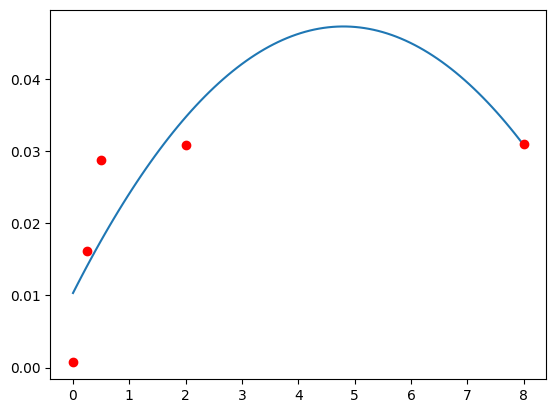

residuo  0.00023646355940249873


In [20]:
n = 2  # parabola di regressione: grado 2
n1 = n+1  # gradi di libertà
A2 = np.vander(x2, increasing=True)[:, :n1]
condA2 = np.linalg.cond(A2)
print("condizionamento di A2 ", condA2)
# Poichè la matrice è mediamente ben condizionata (Ha un indice di condizionamento pari a  65.67493525624782
# (quinfi A.T@A avrà indice di condizionamento pari al quadrato dell'indice di condionamento di A)
# è quindi preferibile usare il metodo QR
alpha2, residuo = qrLS(A2, y2)
xv = np.linspace(np.min(x2), np.max(x2), 100)
pol2 = np.polyval(np.flip(alpha2), xv)
plt.plot(xv, pol2, x2, y2, 'ro')
plt.show()
print("residuo ", residuo)


## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



In [21]:
x3 = np.arange(10, 10.6, 0.5/5)
y3 = np.array([11.0320, 11.1263, 11.1339, 11.1339, 11.1993, 11.1844])


condizionamento di A3  356547027314.2508
Indice di condizionamento di G  1.4095605216900414e+20
errore eqn 0.0018066609384609072
errore qr 0.0001793601626948677
errore svd 0.0001793602362690831


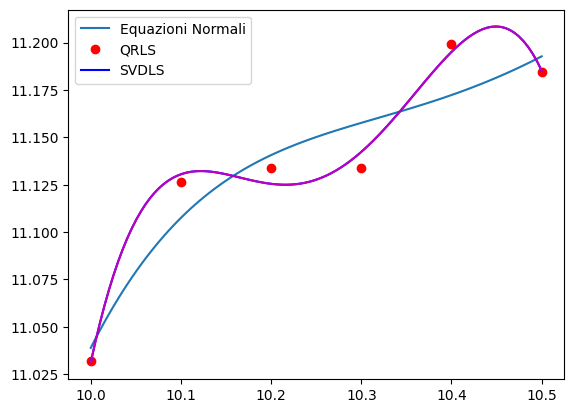

In [22]:
n = 4  # grado del polinomio di regressione: 4
n1 = n+1  # gradi di libertà
A3 = np.vander(x3, increasing=True)[:, :n1]
condA3 = np.linalg.cond(A3)
print("condizionamento di A3 ", condA3)
alpha3_eqn = eqnorm(A3, y3)
xv = np.linspace(np.min(x3), np.max(x3), 100)
pol3_eqn = np.polyval(np.flip(alpha3_eqn), xv)
plt.plot(xv, pol3_eqn, x3, y3, 'ro')
errore_eqn = np.linalg.norm(y3-np.polyval(np.flip(alpha3_eqn), x3))**2
print("errore eqn", errore_eqn)
alpha3_qr, residuo_qr = qrLS(A3, y3)
pol3_qr = np.polyval(np.flip(alpha3_qr), xv)
print("errore qr", residuo_qr)
plt.plot(xv, pol3_qr, 'b')

alpha3_svd, residuo_svd = SVDLS(A3, y3)
pol3_svd = np.polyval(np.flip(alpha3_svd), xv)
print("errore svd", residuo_svd)
plt.plot(xv, pol3_svd, 'm')
plt.legend(['Equazioni Normali', 'QRLS', 'SVDLS'])
plt.show()
# A causa dell'elevato mal condizionamento di G il metodo delle equazioni normali non approssima i dati in maniera
# accurata (errore maggiore rispetto agli altri due metodi, che forniscono la stess accuratezza (grafici sovrapposti))


In [23]:
# Ricalcolo il polimonio di grado 4 a partire da dati perturbati come richiesto dall'esercizio
x3p = x3.copy()
x3p[1] = x3p[1] + 0.013
y3p = y3.copy()
y3p[1] = y3p[1] - 0.001


condizionamento di A3  380506142889.3932
errore qr 0.0002014436950346339
errore svd 0.00020144362775906512


LinAlgError: 5-th leading minor of the array is not positive definite

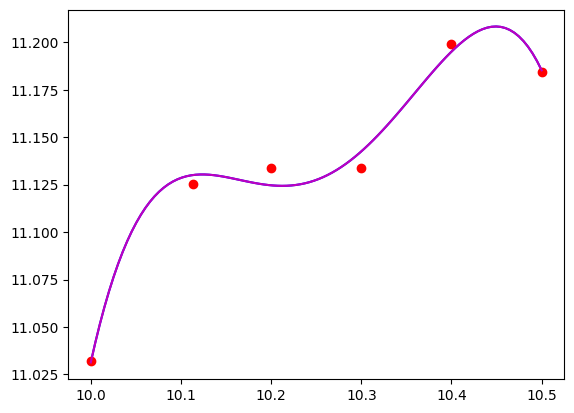

In [24]:
n = 4  # grado del polinomio di regressione: 4
n1 = n+1  # gradi di libertà
A3 = np.vander(x3p, increasing=True)[:, :n1]
condA3 = np.linalg.cond(A3)
print("condizionamento di A3 ", condA3)
# Utilizzo del metodo QR
alpha3_qr, residuo_qr = qrLS(A3, y3p)
pol3_qr = np.polyval(np.flip(alpha3_qr), xv)
print("errore qr", residuo_qr)
plt.plot(xv, pol3_qr, 'b', x3p, y3p, 'ro')
# Utilizzo del metodo svd
alpha3_svd, residuo_svd = SVDLS(A3, y3p)
pol3_svd = np.polyval(np.flip(alpha3_svd), xv)
print("errore svd", residuo_svd)
plt.plot(xv, pol3_svd, 'm')
# Utilizzo del metodo qr
alpha3_eqn = eqnorm(A3, y3p)
xv = np.linspace(np.min(x3), np.max(x3), 100)
pol3_eqn = np.polyval(np.flip(alpha3_eqn), xv)
plt.plot(xv, pol3_eqn)
errore_eqn = np.linalg.norm(y3-np.polyval(np.flip(alpha3), x3))**2
print("errore eqn", errore_eqn)
plt.show()
# Si osserva che a causa dell'elevato indice di condizionamento della matrice A3, a cada di una piccola perturbazione sui dati
# la matrice G risulta "numericamente" non è definita positiva e cholesky dà errore.
